In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
df = pd.read_csv('games.csv')

In [107]:
df.shape

(20058, 16)

In [108]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [109]:
toDrop = ['id','created_at','last_move_at','opening_name','moves','opening_ply','white_id','black_id','victory_status']
df.drop(columns = toDrop,inplace=True)

In [110]:
df.isna().sum()

rated             0
turns             0
winner            0
increment_code    0
white_rating      0
black_rating      0
opening_eco       0
dtype: int64

In [111]:
df.head()

,rated,turns,winner,increment_code,white_rating,black_rating,opening_eco
0,False,13,white,15+2,1500,1191,D10
1,True,16,black,5+10,1322,1261,B00
2,True,61,white,5+10,1496,1500,C20
3,True,61,white,20+0,1439,1454,D02
4,True,95,white,30+3,1523,1469,C41


In [112]:
df = df[['rated','increment_code','white_rating','black_rating','opening_eco','turns','winner']]

In [113]:
df.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner
0,False,15+2,1500,1191,D10,13,white
1,True,5+10,1322,1261,B00,16,black
2,True,5+10,1496,1500,C20,61,white
3,True,20+0,1439,1454,D02,61,white
4,True,30+3,1523,1469,C41,95,white


In [114]:
df.groupby(['winner','rated']).size()

winner  rated
black   False    1723
        True     7384
draw    False     231
        True      719
white   False    1949
        True     8052
dtype: int64

In [115]:
df['rated'].value_counts() 

True     16155
False     3903
Name: rated, dtype: int64

In [116]:
df_rated = df[df['rated'] == True]
df_rated.shape

(16155, 7)

In [117]:
df_unrated = df[df['rated'] == False]
df_unrated.shape

(3903, 7)

In [118]:
df.to_csv('cleanAllGames.csv',index=False)
df_rated.to_csv('ratedGames.csv',index=False)
df_unrated.to_csv('unratedGames.csv',index=False)

In [284]:
df_chess = pd.read_csv('cleanAllGames.csv')

In [285]:
df_chess.shape

(20058, 7)

In [286]:
df_chess.dtypes

rated               bool
increment_code    object
white_rating       int64
black_rating       int64
opening_eco       object
turns              int64
winner            object
dtype: object

In [287]:
df_chess['rated'] = df_chess['rated'].astype(int)

In [288]:
df_chess['winner'].replace({'black':0 , 'draw':1 , 'white':2},inplace=True)

In [289]:
df_chess.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner
0,0,15+2,1500,1191,D10,13,2
1,1,5+10,1322,1261,B00,16,0
2,1,5+10,1496,1500,C20,61,2
3,1,20+0,1439,1454,D02,61,2
4,1,30+3,1523,1469,C41,95,2


In [290]:
df_chess.groupby(['winner','turns']).size()

winner  turns
0       1          2
        2        108
        3         13
        4         36
        5          3
                ... 
2       189        3
        193        1
        205        1
        209        2
        349        2
Length: 528, dtype: int64

In [291]:
df_chess['increment_code'].unique()

array(['15+2', '5+10', '20+0', '30+3', '10+0', '15+30', '15+0', '20+60',
       '5+40', '8+0', '15+15', '15+16', '11+0', '30+60', '15+5', '10+10',
       '15+3', '18+0', '30+30', '20+25', '5+5', '30+0', '40+40', '16+0',
       '6+10', '8+10', '8+12', '7+12', '15+10', '20+5', '20+10', '45+0',
       '5+8', '30+2', '25+0', '10+2', '7+2', '25+25', '7+8', '6+6',
       '10+4', '12+0', '15+1', '2+10', '9+0', '10+9', '6+7', '30+10',
       '30+15', '10+3', '45+30', '9+2', '7+3', '6+5', '25+5', '5+7',
       '8+2', '20+8', '30+5', '25+15', '15+7', '8+8', '5+9', '16+7',
       '10+7', '7+5', '40+20', '10+5', '11+5', '10+15', '180+0', '17+5',
       '8+5', '3+8', '60+120', '90+120', '15+8', '9+1', '9+3', '2+15',
       '10+1', '5+12', '60+10', '5+60', '8+15', '30+25', '12+1', '14+0',
       '60+20', '10+8', '20+3', '14+12', '7+7', '60+0', '45+45', '4+15',
       '5+6', '180+180', '8+3', '4+6', '10+25', '3+10', '7+4', '6+3',
       '5+15', '45+15', '15+20', '6+8', '6+9', '14+8', '6+4', '15+4',
 

In [292]:
df_chess['game_type'] = df_chess['increment_code'].astype(str).str[0:2]

In [293]:
df_chess.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner,game_type
0,0,15+2,1500,1191,D10,13,2,15
1,1,5+10,1322,1261,B00,16,0,5+
2,1,5+10,1496,1500,C20,61,2,5+
3,1,20+0,1439,1454,D02,61,2,20
4,1,30+3,1523,1469,C41,95,2,30


In [294]:
df_chess['game_type'].unique()

array(['15', '5+', '20', '30', '10', '8+', '11', '18', '40', '16', '6+',
       '7+', '45', '25', '12', '2+', '9+', '17', '3+', '60', '90', '14',
       '4+', '13', '19', '0+', '1+', '35', '29', '21'], dtype=object)

In [295]:
df_chess.dtypes

rated              int32
increment_code    object
white_rating       int64
black_rating       int64
opening_eco       object
turns              int64
winner             int64
game_type         object
dtype: object

In [296]:
df_chess['game_type'].replace({'0+': 'bullet' , '1+':'bullet' , '2+':'bullet' ,'3+':'blitz', '4+':'blitz', '5+':'blitz',
                               '6+':'blitz','7+':'blitz','8+':'blitz','9+':'blitz','10':'rapid','11':'rapid','12':'rapid',
                               '13':'rapid','14':'rapid','15':'rapid','16':'classical','17':'classical','18':'classical','19':'classical',
                               '20':'classical','21':'classical','25':'classical','29':'classical','30':'classical','35':'classical','40':'classical','45':'classical',
                               '60':'classical','90':'classical'},inplace=True)
                              
df_chess['game_type'].replace({'bullet':0,'blitz':1,'rapid':2,'classical':3},inplace=True)

In [297]:
df_chess.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner,game_type
0,0,15+2,1500,1191,D10,13,2,2
1,1,5+10,1322,1261,B00,16,0,1
2,1,5+10,1496,1500,C20,61,2,1
3,1,20+0,1439,1454,D02,61,2,3
4,1,30+3,1523,1469,C41,95,2,3


In [298]:
df_chess.groupby(['winner','game_type']).size()

winner  game_type
0       0              69
        1            1793
        2            6107
        3            1138
1       0               4
        1             171
        2             599
        3             176
2       0              58
        1            1975
        2            6628
        3            1340
dtype: int64

In [299]:
df_chess.groupby(['winner','game_type']).agg(['max','min','mean','median'])

rated                      white_rating                     \
                   max min      mean median          max   min         mean   
winner game_type                                                              
0      0             1   0  0.695652      1         2159   992  1516.869565   
       1             1   0  0.789738      1         2458   826  1559.481316   
       2             1   0  0.840183      1         2621   784  1554.473882   
       3             1   0  0.693322      1         2619   788  1507.028998   
1      0             1   0  0.750000      1         2002  1408  1682.000000   
       1             1   0  0.748538      1         2474   937  1651.350877   
       2             1   0  0.797997      1         2524   907  1647.492487   
       3             1   0  0.625000      1         2452  1017  1686.500000   
2      0             1   0  0.775862      1         2276   798  1558.275862   
       1             1   0  0.817215      1         2622   856  1647.603544   
       2             1   0  0.829511      1         2621   784  1634.527610   
       3             1   0  0.667910      1         2700   911  1615.992537   

                         black_rating                            turns      \
                  median          max   min         mean  median   max min   
winner game_type                                                             
0      0          1498.0         2499   843  1693.811594  1697.0   140   2   
       1          1513.0         2621   875  1640.753486  1591.0   222   2   
       2          1539.0         2621   789  1643.594564  1621.0   210   1   
       3          1500.0         2500   938  1602.073814  1562.0   182   2   
1      0          1659.0         2302  1516  1770.500000  1632.0    94   3   
       1          1588.0         2477   946  1630.461988  1562.0   255   3   
       2          1638.0         2524   886  1638.213689  1632.0   259   2   
       3          1651.5         2526   869  1658.914773  1631.5   201   2   
2      0          1508.0         2352  1044  1520.293103  1484.0   149   3   
       1          1606.0         2723   795  1539.376203  1500.0   209   1   
       2          1609.0         2621   804  1545.981744  1530.0   349   1   
       3          1568.5         2445   807  1503.801493  1500.0   185   1   

                                    
                       mean median  
winner game_type                    
0      0          42.811594   44.0  
       1          60.851645   56.0  
       2          61.491240   56.0  
       3          57.494728   52.0  
1      0          40.000000   31.5  
       1          91.444444   99.0  
       2          89.460768   95.0  
       3          70.829545   70.0  
2      0          47.241379   44.0  
       1          58.074430   55.0  
       2          58.592939   53.0  
       3          53.857463   51.0

In [300]:
df_chess['turns'] = pd.cut(df_chess['turns'], bins=[0, 10, 30, 400], include_lowest=True, labels=['start', 'middle', 'end'])

df_chess['turns'].replace({'start':0,'middle':1,'end':2},inplace=True)

In [301]:
df_chess.groupby(['winner','turns']).size()

winner  turns
0       0         276
        1        1251
        2        7580
1       0          40
        1          95
        2         815
2       0         365
        1        1539
        2        8097
dtype: int64

In [302]:
df_chess.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner,game_type
0,0,15+2,1500,1191,D10,1,2,2
1,1,5+10,1322,1261,B00,1,0,1
2,1,5+10,1496,1500,C20,2,2,1
3,1,20+0,1439,1454,D02,2,2,3
4,1,30+3,1523,1469,C41,2,2,3


In [303]:
df_chess = df_chess[['rated','game_type','white_rating','black_rating','opening_eco','winner']]

In [304]:
df_chess.head()

,rated,game_type,white_rating,black_rating,opening_eco,winner
0,0,2,1500,1191,D10,2
1,1,1,1322,1261,B00,0
2,1,1,1496,1500,C20,2
3,1,3,1439,1454,D02,2
4,1,3,1523,1469,C41,2


In [305]:
#bins=[0, 1200, 1400, 1600 ,1800, 2000, 2200,  2300, 2400, 2500, 2700, 3000]
#labels=['novice', 'CDc4', 'CCc3','CBc2','CAc1','CM','FIDE_CM','FIDE_FM','IM','GM','SM'])

df_chess['white_rating'] = pd.cut(df_chess['white_rating'], bins=[0, 1200, 1400, 1600 ,1800, 2000, 2200, 
2300, 2400, 2500, 2700, 3000], include_lowest=True, labels=[0,1,2,3,4,5,6,7,8,9,10])

df_chess['black_rating'] = pd.cut(df_chess['black_rating'], bins=[0, 1200, 1400, 1600 ,1800, 2000, 2200, 
2300, 2400, 2500, 2700, 3000], include_lowest=True, labels=[0,1,2,3,4,5,6,7,8,9,10])

In [306]:
df_chess.head()

,rated,game_type,white_rating,black_rating,opening_eco,winner
0,0,2,2,0,D10,2
1,1,1,1,1,B00,0
2,1,1,2,2,C20,2
3,1,3,2,2,D02,2
4,1,3,2,2,C41,2


In [307]:
df_chess['opening_eco'] = df_chess['opening_eco'].astype(str).str[0:1]

In [308]:
df_chess.head()

,rated,game_type,white_rating,black_rating,opening_eco,winner
0,0,2,2,0,D,2
1,1,1,1,1,B,0
2,1,1,2,2,C,2
3,1,3,2,2,D,2
4,1,3,2,2,C,2


In [309]:
df_chess['opening_eco'].unique()
df_chess['opening_eco'].replace({'A':0 , 'B':1 , 'C':2 , 'D':3 , 'E': 4}, inplace=True)

In [310]:
df_chess.head()

,rated,game_type,white_rating,black_rating,opening_eco,winner
0,0,2,2,0,3,2
1,1,1,1,1,1,0
2,1,1,2,2,2,2
3,1,3,2,2,3,2
4,1,3,2,2,2,2


In [311]:
df_chess.to_csv('forModelingGames.csv',index=False)

In [312]:
df_chess = pd.read_csv('forModelingGames.csv')

In [313]:
X = df_chess[['rated','game_type','white_rating','black_rating','opening_eco']].values
y = df_chess['winner']

In [314]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [340]:
# Normalizing X
X = StandardScaler().fit(X).transform(X)

# Setting training and test data from the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle=True);

# Fitting the classification model
clf = LogisticRegression(multi_class = 'multinomial').fit(X_train, y_train)

# Predicted values from X_test
y_hat = clf.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score
print("logisticRegression Accuracy: ", accuracy_score(y_test, y_hat))

logisticRegression Accuracy:  0.621313035204567


In [341]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[1084 1942]
 [ 446 2834]]


In [342]:
df_chess_noDraws = df_chess[df_chess['winner'] != 1]

df_chess_noDraws.replace({2:1},inplace=True)

X = df_chess_noDraws[['rated','game_type','white_rating','black_rating','opening_eco']].values
y = df_chess_noDraws['winner'].values

C:\Users\Sergio\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


f1score =  0.6919100542775912
accuracy =  0.6219473517285126


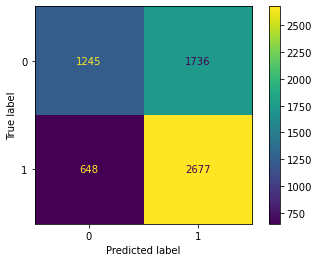

In [349]:
# Normalizing X
X = StandardScaler().fit(X).transform(X)

# Setting training and test data from the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, shuffle=True);
X_train = np.around(X_train, decimals = 5)
X_test = np.around(X_test, decimals = 5)

# We train the binary logistic regression model and fit
clf = LogisticRegression(solver='lbfgs',max_iter=3000).fit(X_train, y_train)
    
# Predicted values from X_test
y_hat = clf.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_hat)
prec = average_precision_score(y_test, y_hat, average='macro')
rec = recall_score(y_test, y_hat, average='macro')
f1scor = f1_score(y_test,y_hat,average='binary')
print('f1score = ', f1scor)
print('accuracy = ', acc)

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

ROC AUC:  0.6658480131857303


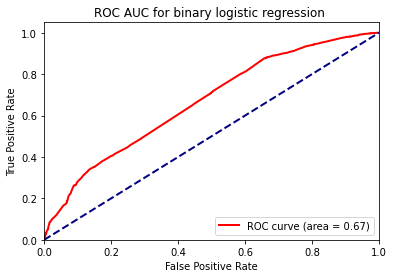

In [344]:
# We will now calculate the ROC AUC and plot it
# Learn to predict each class against the other
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve, ROC area and plot it
fpr, tpr, threshold = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print('ROC AUC: ', roc_auc)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC for binary logistic regression ')
plt.legend(loc="lower right")
plt.show()

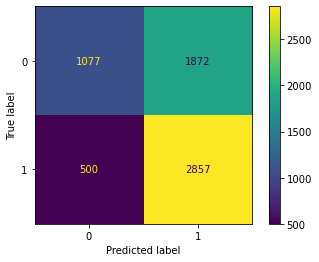

In [348]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)
plt.show()

In [346]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
    
# Normalizing X
# Setting training and test data from the dataset
DT = tree.DecisionTreeClassifier(criterion="entropy",max_depth=5)
DT = DT.fit(X_train,y_train)
    
# Predicted values from X_test
y_hat = DT.predict(X_test)
    
print("DecisionTrees's f1_score: ", f1_score(y_test,y_hat, average = 'macro'))
print("DecisionTrees's Accuracy: ", accuracy_score(y_test, y_hat))

cm = confusion_matrix(y_test, y_hat)
print(cm)
    
cmfor0 = cm[0,0]/np.sum(cm[0,]); print(cmfor0)
cmfor1 = cm[1,1]/np.sum(cm[1,]); print(cmfor1)

DecisionTrees's f1_score:  0.5994331924458234
DecisionTrees's Accuracy:  0.6124326038693308
[[1363 1586]
 [ 858 2499]]
0.46219057307561884
0.7444146559428061


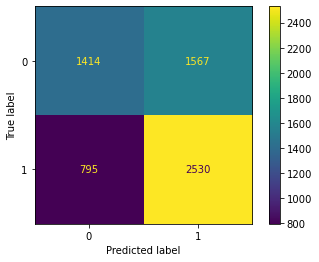

In [350]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(DT, X_test, y_test)
plt.show()